In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn.linear_model, sklearn.datasets 
from sklearn import kernel_ridge
from sklearn.metrics import mean_squared_error
import math
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("/Users/sandeepchittiboina/Downloads/ML/Comp1801CourseworkData.csv")

In [3]:
data.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,32,314.06,30.14,0,Degree,Private sector,Male,London,60173.49
1,20,3758.36,149.36,4,GCSE,Private sector,Female,South East,42965.45
2,36,601.72,21.87,0,Masters,Private sector,Male,East of England,54924.41
3,21,44.89,182.80,9,Masters,Private sector,Female,Northern Ireland,26734.99
4,24,614.80,194.34,0,GCSE,Private sector,Male,Scotland,15325.23


In [4]:
le = preprocessing.LabelEncoder()

for i in range(0,data.shape[1]):
    if data.dtypes[i]=='object':
        data[data.columns[i]] = le.fit_transform(data[data.columns[i]])

In [5]:
data.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,32,314.06,30.14,0,1,0,1,2,60173.49
1,20,3758.36,149.36,4,2,0,0,7,42965.45
2,36,601.72,21.87,0,3,0,1,1,54924.41
3,21,44.89,182.80,9,3,0,0,5,26734.99
4,24,614.80,194.34,0,2,0,1,6,15325.23


In [6]:
data.describe()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.577000,930.079200,151.082320,4.77900,2.742000,0.901000,0.456000,5.627000,46823.858860
std,13.147507,1016.477186,85.842607,3.67119,2.107101,1.270753,0.498309,3.241663,22595.237921
min,19.000000,40.430000,5.110000,0.00000,0.000000,0.000000,0.000000,0.000000,12441.660000
25%,29.000000,219.912500,79.337500,2.00000,1.000000,0.000000,0.000000,3.000000,27678.380000
50%,39.000000,440.490000,153.525000,4.00000,2.000000,0.000000,0.000000,6.000000,46004.480000
75%,49.000000,1246.695000,219.645000,7.00000,5.000000,2.000000,1.000000,8.000000,60967.432500
max,82.000000,4392.220000,300.880000,17.00000,6.000000,3.000000,1.000000,11.000000,145225.720000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   int64  
 1   SiteSpending         1000 non-null   float64
 2   SiteTime             1000 non-null   float64
 3   RecommendImpression  1000 non-null   int64  
 4   Education            1000 non-null   int64  
 5   WorkType             1000 non-null   int64  
 6   Sex                  1000 non-null   int64  
 7   Region               1000 non-null   int64  
 8   Salary               1000 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 70.4 KB


# Regression



In [8]:
X = data[['Age', 'SiteSpending','SiteTime','RecommendImpression','Education','WorkType','Sex','Region']]
y = data['Salary']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
pred=regr.predict(X_test)
regr.score(X_test, y_test)

0.29367721139243297

In [11]:
MSE=mean_squared_error(y_test,pred)
RMSE=math.sqrt(MSE)  

print("The MSE for liner reg model is", MSE)
print("The RMSE for liner reg model is", RMSE)

The MSE for liner reg model is 334340661.0616987
The RMSE for liner reg model is 18284.984579203196


In [12]:
from sklearn.metrics import r2_score

r2_score(y_test,pred)


0.29367721139243297

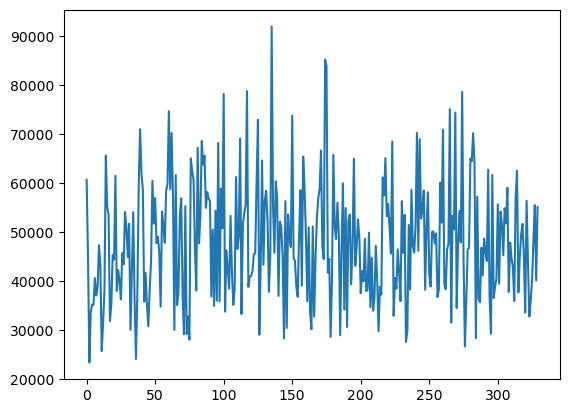

In [13]:
plt.plot(pred)

In [14]:
from sklearn.ensemble import ExtraTreesRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
reg.score(X_test, y_test)

0.8279567568412703

In [15]:
pred2=reg.predict(X_test)

In [16]:
MSE2=mean_squared_error(y_test,pred2)
RMSE2=math.sqrt(MSE)  

print("The MSE for ExtraTreesRegressor is", MSE2)
print("The RMSE for ExtraTreesRegressor is", RMSE2)

The MSE for ExtraTreesRegressor is 87998538.74369547
The RMSE for ExtraTreesRegressor is 18284.984579203196


In [17]:
from sklearn.metrics import r2_score

r2_score(y_test,pred2)

0.8279567568412703

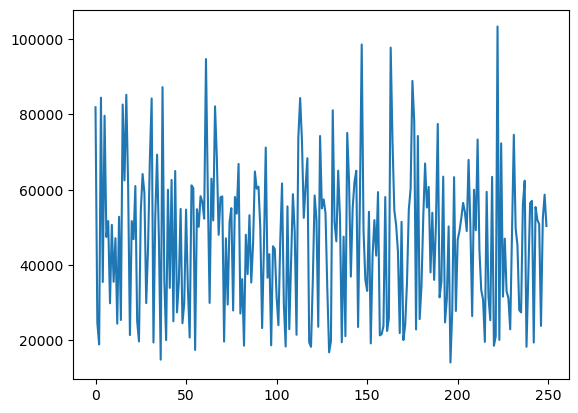

In [18]:
plt.plot(pred2)

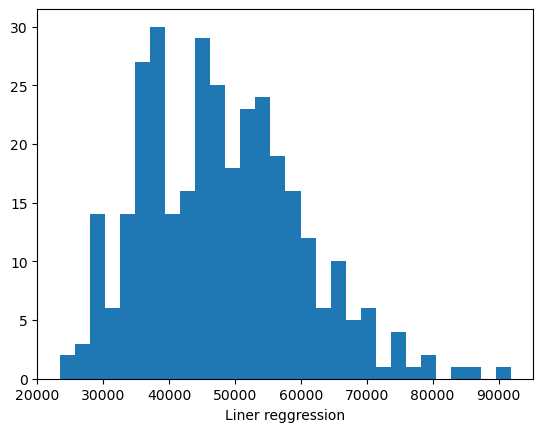

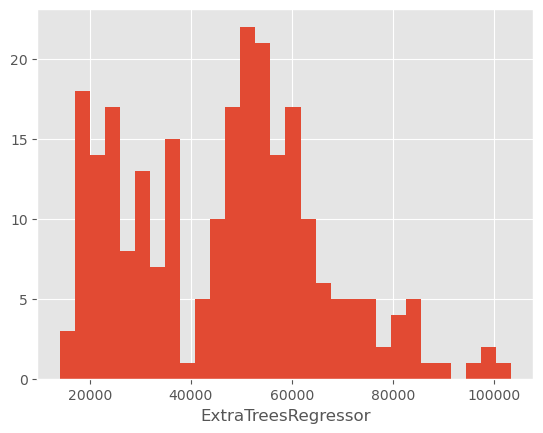

In [19]:
plt.hist(pred, bins = 30)
plt.style.use('ggplot')
plt.xlabel('Liner reggression');
plt.show()

plt.hist(pred2, bins = 30)
plt.style.use('ggplot')
plt.xlabel('ExtraTreesRegressor');
plt.show()

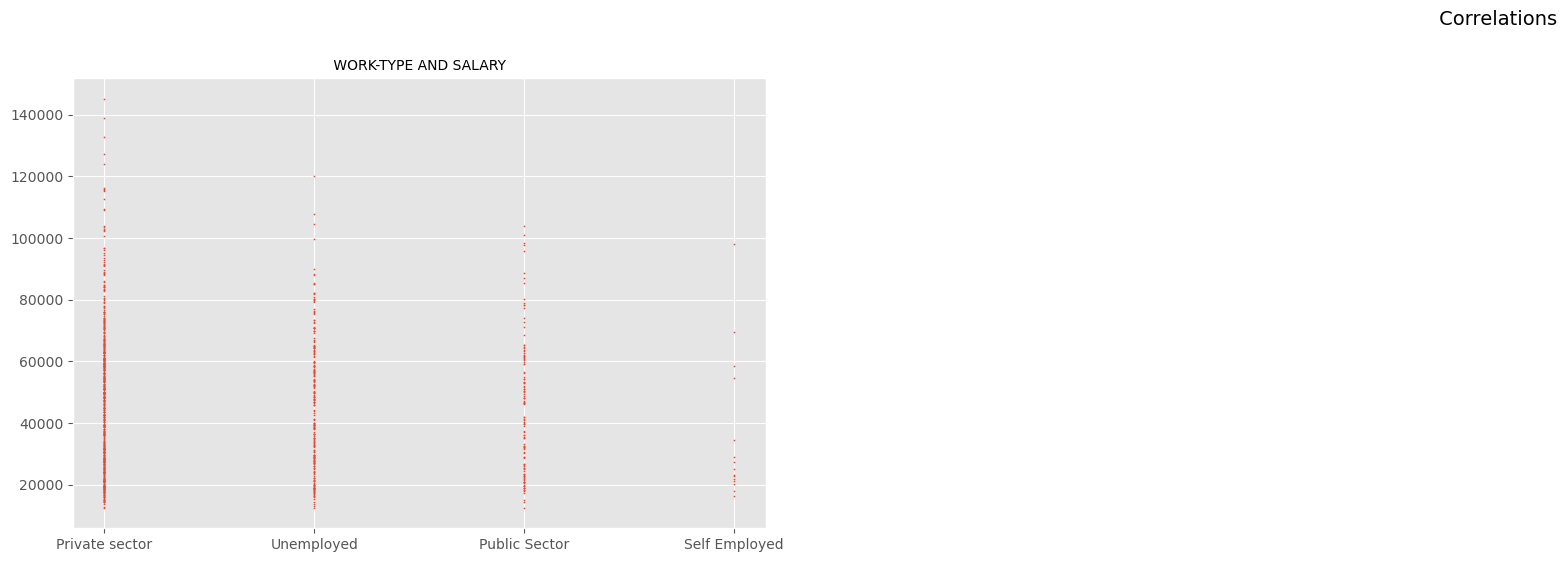

In [20]:
data_1=pd.read_csv("/Users/sandeepchittiboina/Downloads/ML/Comp1801CourseworkData.csv")
selected = ['WorkType', 'Salary']

counter = 1
fig = plt.figure(figsize=(30,20))
fig.suptitle(' Correlations', fontsize=14, position=(0.5, 1.0))
for i, name_i in enumerate(selected):
    for j in range(i + 1, len(selected)):
        name_j = selected[j]
        sub = fig.add_subplot(4, 4, counter)
        sub.set_title(' WORK-TYPE AND SALARY ' , fontsize=10)
        sub.scatter(data_1[name_i], data_1[name_j], s=0.5)
        counter += 1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()

# classification

In [21]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC() # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

ValueError: Unknown label type: 'continuous'

In [ ]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
X_transformed = lab.fit_transform(X)

#view transformed values
print(X_transformed)

In [ ]:
data.head()


In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
#from sklearn.cross_validation import train_test_split
model = GaussianNB
model.fit(X_train, y_train)

In [ ]:
!pip install sklearn.cross_validation


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
#from sklearn.cross_validation import train_test_split
#X = data
#Y = target
model = GaussianNB()
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
model.fit(X_train, y_train)

# k-means

In [22]:
a=data['WorkType']

In [23]:
b=data['Salary']


In [24]:
df3 = pd.DataFrame(data, columns=['WorkType','Salary'])
df3.head()

,WorkType,Salary
0,0,60173.49
1,0,42965.45
2,0,54924.41
3,0,26734.99
4,0,15325.23


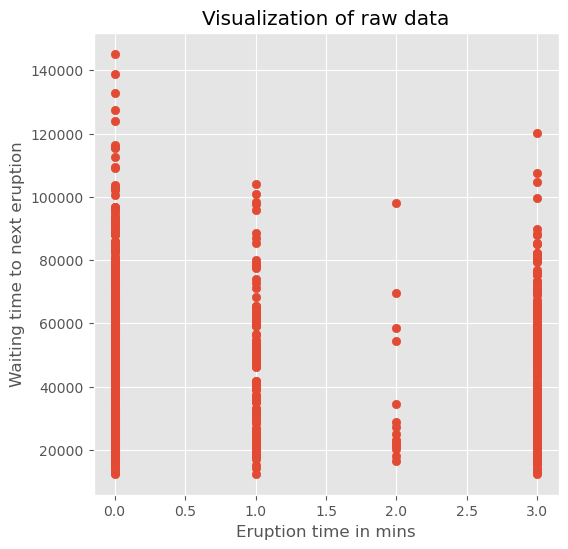

In [25]:
plt.figure(figsize=(6, 6))
plt.scatter(df3.iloc[:, 0], df3.iloc[:, 1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');

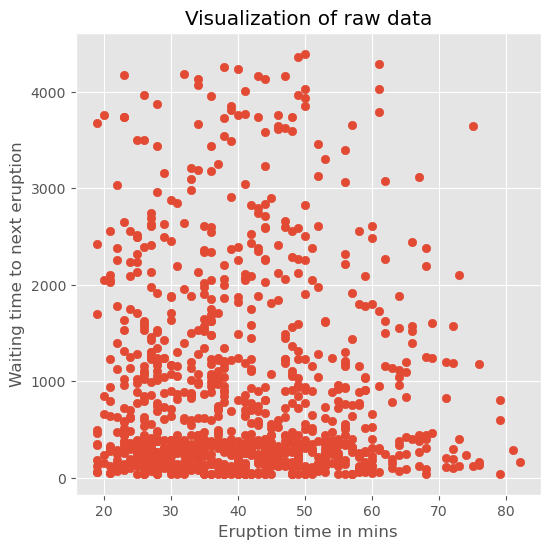

In [26]:

plt.figure(figsize=(6, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');

In [27]:

import numpy as np
from numpy.linalg import norm


class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)


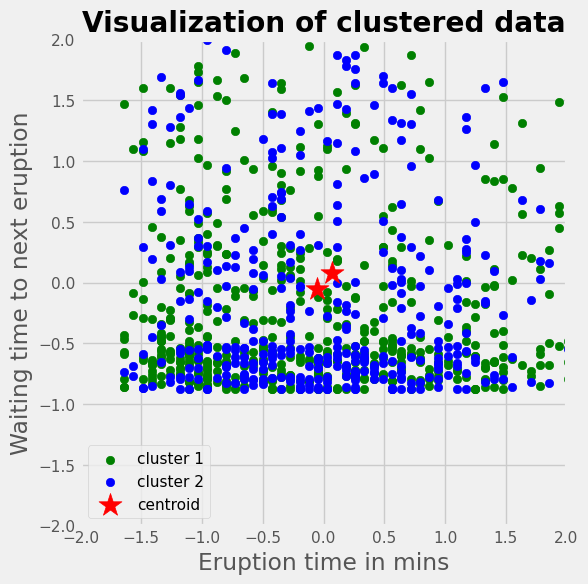

In [28]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
#from sklearn.datasets.samples_generator import (make_blobs,make_circles,make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

# Standardize the data
X_std = StandardScaler().fit_transform(data)

# Run local implementation of kmeans
km = Kmeans(n_clusters=2, max_iter=100)
km.fit(X_std)
centroids = km.centroids

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],c='green', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

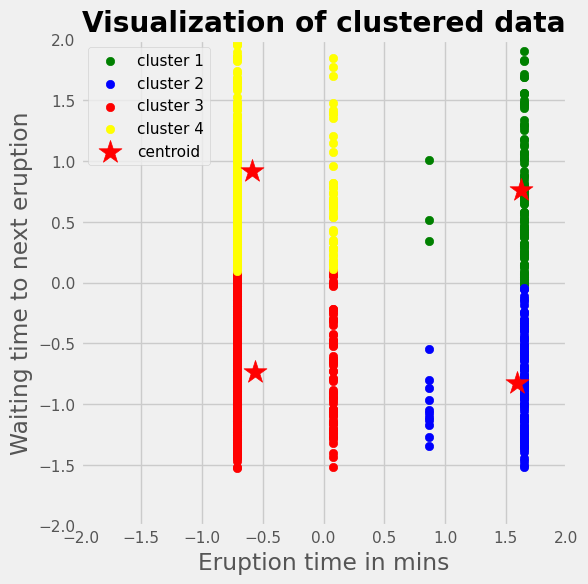

In [57]:
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

# Standardize the data
X_std = StandardScaler().fit_transform(df3)

# Run local implementation of kmeans
km = Kmeans(n_clusters=4, max_iter=100)
km.fit(X_std)
centroids = km.centroids

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],c='green', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],c='blue', label='cluster 2')
plt.scatter(X_std[km.labels == 2, 0], X_std[km.labels == 2, 1],c='red', label='cluster 3')
plt.scatter(X_std[km.labels == 3, 0], X_std[km.labels == 3, 1],c='yellow', label='cluster 4')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');